In [1]:
# setup shits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
femur_raw = pd.read_csv('xsens_quaternion/assisted_squat/femur_quat_precleaned.csv')
tibia_raw = pd.read_csv('xsens_quaternion/assisted_squat/tibia_quat_precleaned.csv')
print(femur_raw.columns)
print(tibia_raw.columns)

Index(['PacketCounter_femur', 'SampleTimeFine_femur', 'Quat_W_femur',
       'Quat_X_femur', 'Quat_Y_femur', 'Quat_Z_femur', 'FreeAcc_X_femur',
       'FreeAcc_Y_femur', 'FreeAcc_Z_femur'],
      dtype='object')
Index(['PacketCounter_tibia', 'SampleTimeFine_tibia', 'Quat_W_tibia',
       'Quat_X_tibia', 'Quat_Y_tibia', 'Quat_Z_tibia', 'FreeAcc_X_tibia',
       'FreeAcc_Y_tibia', 'FreeAcc_Z_tibia'],
      dtype='object')


In [3]:
combined_raw = femur_raw.merge(tibia_raw, how='outer', left_on='SampleTimeFine_femur', right_on='SampleTimeFine_tibia')
# print(combined_raw.head(40))
print(combined_raw.tail(1))
combined_raw.dropna(inplace=True)
print(combined_raw.tail(1))
combined_raw.to_csv('./xsens_quaternion/assisted_squat/combined_raw.csv', index=False)

      PacketCounter_femur  SampleTimeFine_femur  Quat_W_femur  Quat_X_femur  \
3262                 3263             340265691      0.690789      0.137435   

      Quat_Y_femur  Quat_Z_femur  FreeAcc_X_femur  FreeAcc_Y_femur  \
3262     -0.667125      0.242644        -0.144123        -0.218294   

      FreeAcc_Z_femur  PacketCounter_tibia  SampleTimeFine_tibia  \
3262         0.223702                 3263             340265691   

      Quat_W_tibia  Quat_X_tibia  Quat_Y_tibia  Quat_Z_tibia  FreeAcc_X_tibia  \
3262      0.603692     -0.288866      -0.72629     -0.156894        -0.104981   

      FreeAcc_Y_tibia  FreeAcc_Z_tibia  
3262         0.187433        -0.049526  
      PacketCounter_femur  SampleTimeFine_femur  Quat_W_femur  Quat_X_femur  \
3262                 3263             340265691      0.690789      0.137435   

      Quat_Y_femur  Quat_Z_femur  FreeAcc_X_femur  FreeAcc_Y_femur  \
3262     -0.667125      0.242644        -0.144123        -0.218294   

      FreeAcc_Z_fe

PermissionError: [Errno 13] Permission denied: './xsens_quaternion/assisted_squat/combined_raw.csv'

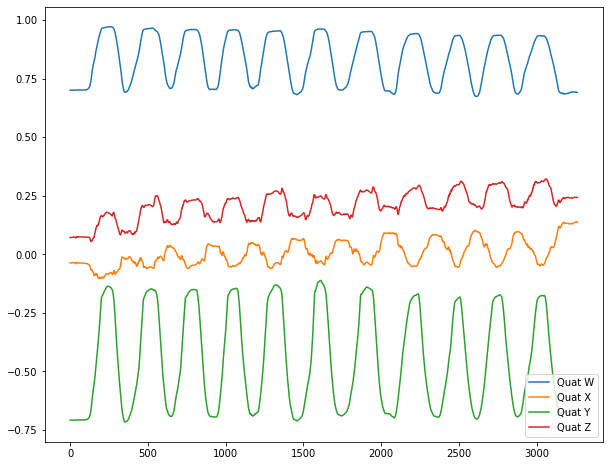

In [4]:
plt.plot(combined_raw['PacketCounter_femur'], combined_raw['Quat_W_femur'], label = 'Quat W')
plt.plot(combined_raw['PacketCounter_femur'], combined_raw['Quat_X_femur'], label = 'Quat X')
plt.plot(combined_raw['PacketCounter_femur'], combined_raw['Quat_Y_femur'], label = 'Quat Y')
plt.plot(combined_raw['PacketCounter_femur'], combined_raw['Quat_Z_femur'], label = 'Quat Z')

plt.legend()
plt.savefig('./xsens_quaternion/assisted_squat/quat_assisted_squat.png')
plt.show()


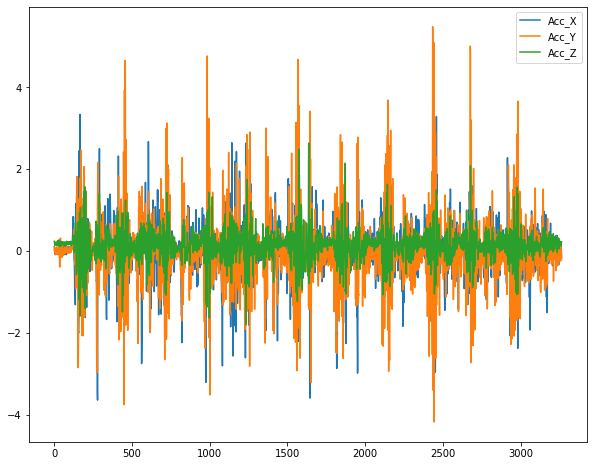

In [5]:
plt.plot(combined_raw['PacketCounter_femur'], combined_raw['FreeAcc_X_femur'], label = 'Acc_X')
plt.plot(combined_raw['PacketCounter_femur'], combined_raw['FreeAcc_Y_femur'], label = 'Acc_Y')
plt.plot(combined_raw['PacketCounter_femur'], combined_raw['FreeAcc_Z_femur'], label = 'Acc_Z')

plt.legend()
plt.savefig('./xsens_quaternion/assisted_squat/acc_assisted_squat.png')
plt.show()



### from scipy.signal import find_peaks

peak_data = combined_raw['Quat_Y_femur']
baseline = np.mean(peak_data[0:10])

top_peaks, _ = find_peaks(peak_data, height=baseline*1.05) # arbitrary multiplier
plt.plot(peak_data)
plt.plot(top_peaks, peak_data[top_peaks], "x")
plt.plot(np.zeros_like(peak_data), "--", color="gray")
plt.show()

print(peak_data[top_peaks])

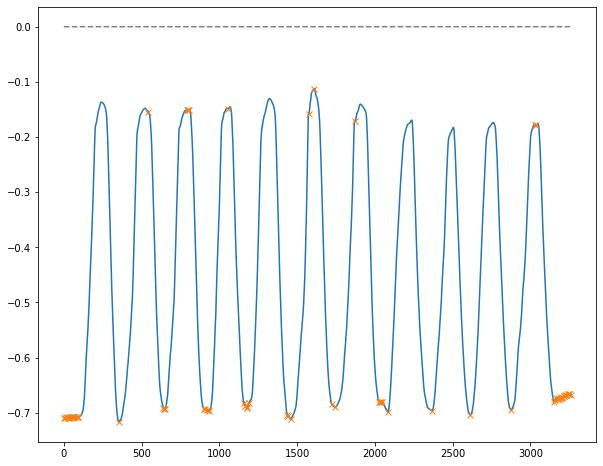

In [9]:
troughs, _ = find_peaks(-peak_data) # arbitrary multiplier
plt.plot(peak_data)
plt.plot(troughs, peak_data[troughs], "x")
plt.plot(np.zeros_like(peak_data), "--", color="gray")
plt.show()

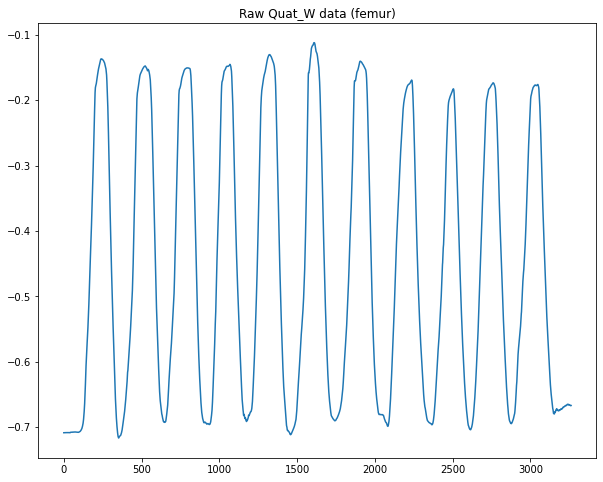

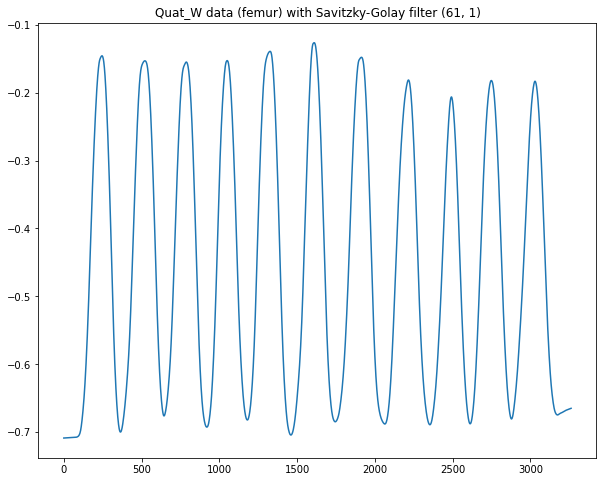

[ 245  521  788 1051 1326 1610 1914 2216 2492 2749 3030]


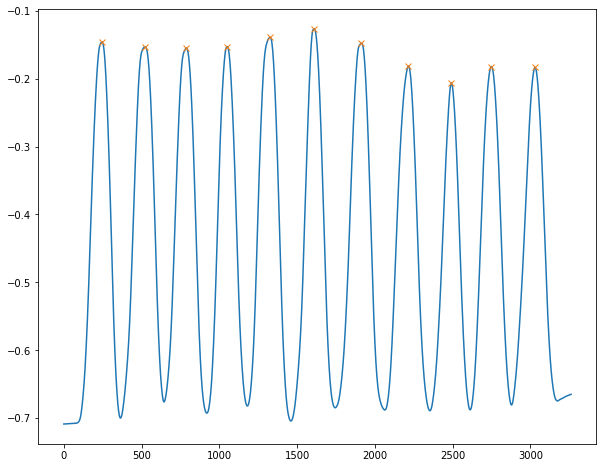

In [12]:
from scipy.signal import savgol_filter
test_smooth = savgol_filter(peak_data, 61, 1)
smooth_peaks, _ = find_peaks(test_smooth, height=baseline*1.05)

plt.plot(peak_data)
plt.title("Raw Quat_W data (femur)")
plt.savefig('raw_quat_w_femur.png')
plt.show()

plt.plot(test_smooth)
plt.title("Quat_W data (femur) with Savitzky-Golay filter (61, 1)")
plt.savefig('quat_w_savgol_61_1.png')
plt.show()

plt.plot(test_smooth)
plt.plot(smooth_peaks, test_smooth[smooth_peaks], "x")
print(smooth_peaks)